군집화(Clustering) : Kmeans

예측된 클러스터 레이블(앞 10개): [1 1 1 1 1 1 1 1 1 1]
클러스터 중심 좌표:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


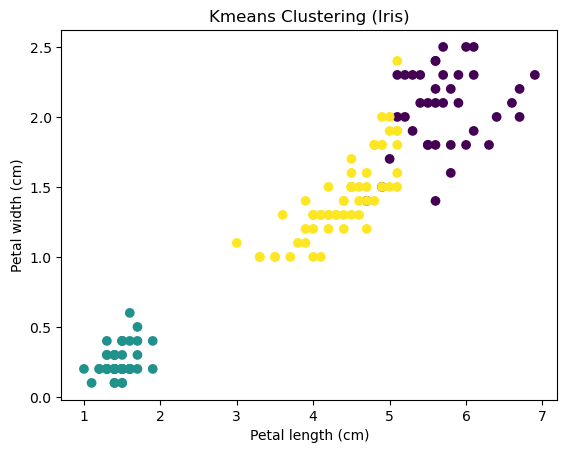

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# KMeans 모델 (군집 3개)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

print("예측된 클러스터 레이블(앞 10개):", y_pred[:10])
print("클러스터 중심 좌표:", kmeans.cluster_centers_, sep='\n')

# 시각화
plt.scatter(X[:,2], X[:,3], c=y_pred, cmap="viridis")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Kmeans Clustering (Iris)")
plt.show()

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

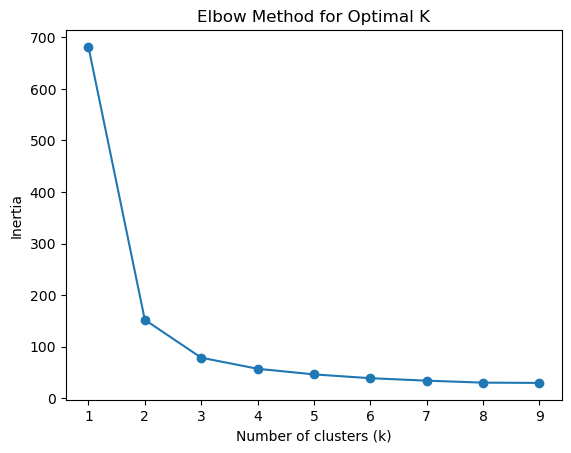

In [ ]:
# inertia 엘보우

inertia_list = []
K_range = range(1, 10)

for k in K_range:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X)
  inertia_list.append(model.inertia_)

plt.plot(K_range, inertia_list, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

1 -> 2가 극심한 건 당연 (클러스터링 시작이라)

따라서, 2 이후부터 관찰해서 엘보우 지점 찾기

c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dkjjk\anaconda3\envs\ai-dp-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

   k     inertia  silhouette
0  2  222.361705    0.686735
1  3  191.024737    0.518988
2  4  114.354072    0.356474
3  5   91.047670    0.311512
4  6   81.550757    0.265122
5  7   80.777739    0.212880
6  8   64.426748    0.286311
7  9   55.706900    0.268022


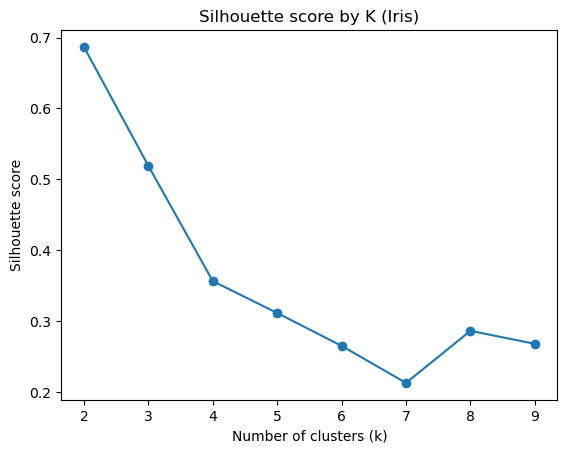

In [9]:
# 실루엣 점수(Silhouette Score)로 군집 품질 평가
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data

# KMeans Pipeline
# KMeans도 거리(유클리드) 기반 알고리즘 => 스케일링 권장 (단위가 큰 득성이 군집화 지배하지 않도록)
def make_pipeline(k, random_state=42):
  return Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=k, random_state=random_state))
  ])

K_range = range(2, 10)
inertias = [] # 내부 응집도
sil_scores = [] # 응집도 + 분리도


for k in K_range:
  pipe = make_pipeline(k)
  labels = pipe.fit_predict(X)
  inertia = pipe.named_steps["kmeans"].inertia_
  sil = silhouette_score(X, labels)
  inertias.append(inertia)
  sil_scores.append(sil)

df_k = pd.DataFrame({
  "k": list(K_range),
  "inertia": inertias,
  "silhouette": sil_scores
})
print(df_k)

plt.plot(list(K_range), scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette score by K (Iris)")
plt.show()

inertia : 작을수록 응집도 크다 (단, K 커지면 자동으로 줄어들기 때문에 엘보우 체크)

silhouette : 응집도 + 분리도 -> 실루엣 점수가 가장 높은 K 지점(피크) 가 K 후보<br>
실루엣 점수 피크는 실제 라벨수와 일치하지 않는다.<br>


따라서 K 후보는 silhouette + inertia(엘보우) + 도메인 지식 종합해서 결정
- 실루엣 -> K=2
- 엘보우 -> K=3
- 도메인 지식 -> 실제 품종 3개이므로 K=3

In [ ]:
# 샘플별 실루엣 분포 : 플롯 시각화